In [1]:
#11.2.1 K-Means

In [2]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [8]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()

#chap11 > data 폴더에 있는 pets.zip 파일을 선택합니다.
train_dir = "pets.zip"
!unzip pets.zip -d ./pets       #pets 폴더 만들고 그 폴더에 압축 풀기

Saving pets.zip to pets (1).zip
Archive:  pets.zip
  inflating: ./pets/11175.jpg        
  inflating: ./pets/11247.jpg        
  inflating: ./pets/11248.jpg        
  inflating: ./pets/119.jpg          
  inflating: ./pets/125.jpg          
  inflating: ./pets/128.jpg          
  inflating: ./pets/130.jpg          
  inflating: ./pets/139.jpg          
  inflating: ./pets/143.jpg          
  inflating: ./pets/145.jpg          
  inflating: ./pets/167.jpg          
  inflating: ./pets/229.jpg          
  inflating: ./pets/23.jpg           
  inflating: ./pets/232.jpg          
  inflating: ./pets/247.jpg          
  inflating: ./pets/278.jpg          
  inflating: ./pets/310.jpg          
  inflating: ./pets/313.jpg          
  inflating: ./pets/53.jpg           
  inflating: ./pets/54.jpg           
  inflating: ./pets/6408.jpg         
  inflating: ./pets/6591.jpg         
  inflating: ./pets/6604.jpg         
  inflating: ./pets/6667.jpg         
  inflating: ./pets/6895.jpg         

In [9]:
input_dir = 'pets'
glob_dir = input_dir + '/*.jpg'

images = [cv2.resize(cv2.imread(file), (224, 224)) for file in glob.glob(glob_dir)]
paths = [file for file in glob.glob(glob_dir)]
images = np.array(np.float32(images).reshape(len(images), -1)/255)

In [10]:
model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
predictions = model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

9412608/9406464 [==============================] - 0s 0us/step


In [13]:
!mkdir output

In [14]:
k = 2
kmodel = KMeans(n_clusters=k, n_jobs=-1, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
shutil.rmtree('./output')
for i in range(k):
    os.makedirs("./output" + str(i))
for i in range(len(paths)):
    shutil.copy2(paths[i], "./output"+str(kpredictions[i]))

In [15]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric = 'euclidean'))
    kl.append(k)

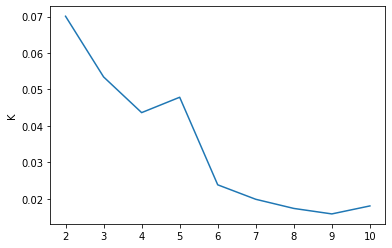

In [16]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.show()

In [17]:
#11.2.2 Gaussian Mixture Model

In [18]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X_train = np.load('data.npy')

Saving data.npy to data.npy


[[3.04641134 3.10654272]
 [1.60718016 1.35251723]]


[[[ 0.83656079  0.37865596]
  [ 0.37865596  0.72727426]]

 [[ 0.74995307 -0.5010097 ]
  [-0.5010097   0.74377694]]]


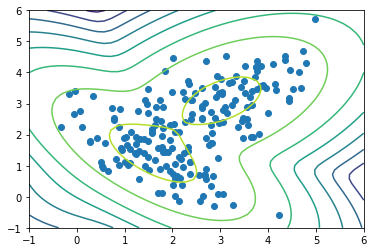

In [19]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

In [20]:
#11.2.3 자기조직화 지도 (Self-Organizing Map, SOM)

In [22]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.7-cp37-none-any.whl size=8609 sha256=8170b9b08d295c0a65ccfc0b78c7f6bb2e7a044ea717f2222a7ef631ad204a75
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built MiniSom


In [23]:
import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom  
from pylab import plot,axis,show,pcolor,colorbar,bone

digits = load_digits()
data = digits.data
labels = digits.target

SOM 초기화.

. SOM 진행 종료


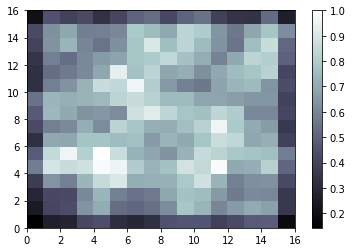

In [24]:
som = MiniSom(16,16,64,sigma=1.0,learning_rate=0.5)
som.random_weights_init(data)
print("SOM 초기화.")
som.train_random(data,10000) 
print("\n. SOM 진행 종료")

bone()
pcolor(som.distance_map().T) 
colorbar()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: F

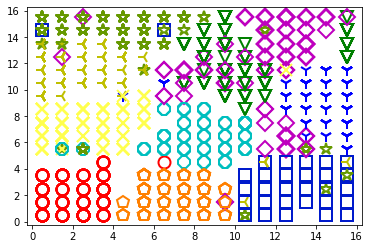

In [25]:
labels[labels == '0'] = 0
labels[labels == '1'] = 1
labels[labels == '2'] = 2
labels[labels == '3'] = 3
labels[labels == '4'] = 4
labels[labels == '5'] = 5
labels[labels == '6'] = 6
labels[labels == '7'] = 7
labels[labels == '8'] = 8
labels[labels == '9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]
for cnt,xx in enumerate(data):
   w = som.winner(xx) 
   plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],    
   markerfacecolor='None', markeredgecolor=colors[labels[cnt]], 
   markersize=12, markeredgewidth=2)

show()